# Thinkful Drill: Data Cleaning and Validation

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
%matplotlib inline

Analysis:
    
    1. Determine the five most common journals and the total articles for each
    2. Calculate the mean, median, and standard deviation of the open-access cost per article for each journal 
    3. Identify the open access prices paid by subject area.

In [71]:
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding='iso-8859-7')

df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [72]:
#Examine the DataFrame

print(df.columns)
print(df.shape)
print(df.dtypes)
df.describe()

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')
(2127, 5)
PMID/PMCID                                             object
Publisher                                              object
Journal title                                          object
Article title                                          object
COST (£) charged to Wellcome (inc VAT when charged)    object
dtype: object


,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,In Process,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [73]:
# Clean the cost in sterling column so we can then make it numeric for visuals or initial observations

df['COST (£) charged to Wellcome (inc VAT when charged)'].astype(str)

# Split on '£'. We'll use the Pandas split method.
word_split = df['COST (£) charged to Wellcome (inc VAT when charged)'].str.split('£', expand=True)

# Set the cost to a new column
df['COST (£) charged to Wellcome (inc VAT when charged)'] = word_split[1]

# Make it into a numeric
df['COST (£) charged to Wellcome (inc VAT when charged)'] = df['COST (£) charged to Wellcome (inc VAT when charged)'].astype(float)

df

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78


In [74]:
# Fill in missing data in the journal title section
df['Journal title'].fillna('No Title')

df.loc[:, 'Publisher'] = df['Publisher'].str.strip()
df.loc[:, 'Journal title'] = df['Journal title'].str.strip()
df.loc[:, 'Article title'] = df['Article title'].str.strip()

#df['journal_title'].nunique()

# put journal names, publisher, and article titltes all in lowercase for easier identification of duplicates
df['Publisher'] = df['Publisher'].apply(lambda x: str(x).lower())
df['Journal title'] = df['Journal title'].apply(lambda x: str(x).lower())
df['Article title'] = df['Article title'].apply(lambda x: str(x).lower())

# Find duplicate articles for human error
print(df['Article title'].count())
print(df[df.duplicated('Article title', keep=False)])

2127
     PMID/PMCID                  Publisher Journal title  \
1490    Pending  public library of science      plos one   
1496        NaN  public library of science      plos one   

                                          Article title  \
1490  exclusive breastfeeding, diarrhoel morbidity a...   
1496  exclusive breastfeeding, diarrhoel morbidity a...   

      COST (£) charged to Wellcome (inc VAT when charged)  
1490                                             825.68    
1496                                             825.68    


In [ ]:
# Cleaning the Journal title section



In [75]:
# Delete duplicates

df = df.drop_duplicates('Article title')

df

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,cup,psychological medicine,reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,acs,biomacromolecules,structural characterization of a model gram-ne...,2381.04
2,23043264 PMC3506128,acs,j med chem,"fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,acs,j med chem,orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,acs,j org chem,regioselective opening of myo-inositol orthoes...,685.88
5,PMC3579457,acs,journal of medicinal chemistry,comparative structural and functional studies ...,2392.20
6,PMC3709265,acs,journal of proteome research,mapping proteolytic processing in the secretom...,2367.95
7,23057412 PMC3495574,acs,mol pharm,quantitative silencing of egfp reporter gene b...,649.33
8,PMCID: PMC3780468,acs (amercian chemical society) publications,acs chemical biology,a novel allosteric inhibitor of the uridine di...,1294.59
9,PMCID: PMC3621575,acs (amercian chemical society) publications,acs chemical biology,chemical proteomic analysis reveals the drugab...,1294.78


### Question 1. Determine the five most common journals and the total articles for each

In [76]:
df['Journal title'].value_counts(dropna=False)[:5]

plos one                           189
journal of biological chemistry     53
neuroimage                          29
nucleic acids research              26
plos pathogens                      24
Name: Journal title, dtype: int64

### Question 2. Calculate the mean, median, and standard deviation of the open-access cost per article for each journal 

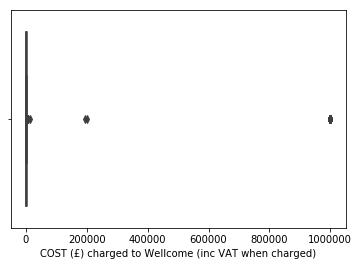

In [80]:
# Plot the initial costs overall to identify outliers

sns.boxplot(df['COST (£) charged to Wellcome (inc VAT when charged)'])
plt.show()

In [81]:
#Winsorize the data

df['COST (£) charged to Wellcome (inc VAT when charged)'] = scipy.stats.mstats.winsorize(df['COST (£) charged to Wellcome (inc VAT when charged)'], limits = 0.05)



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


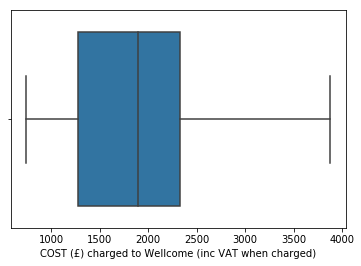

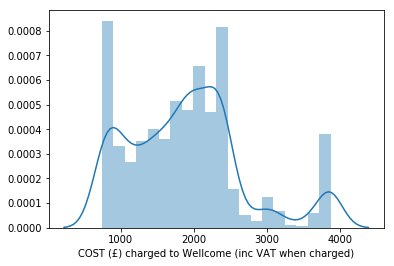

count    2126.000000
mean     1890.788678
std       796.899353
min       741.350000
25%      1280.835000
50%      1896.785000
75%      2328.430000
max      3877.480000
Name: COST (£) charged to Wellcome (inc VAT when charged), dtype: float64


In [83]:
sns.boxplot(df['COST (£) charged to Wellcome (inc VAT when charged)'])
plt.show()

sns.distplot(df['COST (£) charged to Wellcome (inc VAT when charged)'])
plt.show()

print(df['COST (£) charged to Wellcome (inc VAT when charged)'].describe())

In [84]:
df.groupby(['Journal title', 'Article title'])['COST (£) charged to Wellcome (inc VAT when charged)'].agg(['mean', 'median', np.nanstd])

mean  \
Journal title                                      Article title                                                 
academy of nutrition and dietetics                 parent support and parent mediated behaviours a...  2379.54   
acs chemical biology                               a novel allosteric inhibitor of the uridine dip...  1294.59   
                                                   chemical proteomic analysis reveals the drugabi...  1294.78   
                                                   discovery of ?2 adrenergic receptor ligands usi...   947.07   
                                                   discovery of an allosteric inhibitor binding si...  1267.76   
                                                   synthesis of alpha-glucan in mycobacteria invol...  2286.73   
acs chemical neuroscience                          continuous online microdialysis using microflui...  1186.80   
acs nano                                           hydroxy-terminated conjugated polymer nanoparti...   741.35   
                                                   skin dendritic cell targeting via microneedle a...   741.35   
acta crystallographica section d,  biological c... clustering procedures for the optimal selection...   771.42   
acta crystallographica section d: biological cr... intensity statistics in the presence of transla...   773.74   
acta crystallographica section f: structural bi... structure of diaminohydroxyphosphoribosylaminop...   785.60   
                                                   structure of pseudomonas aeruginosa inosine 5'-...   807.67   
acta crystallographica, section d                  nearest-cell: a fast and easy tool for locating...   757.18   
acta crystallography d                             crystallization, dehydration and experimental p...   774.19   
acta d                                             structure of hla-a*0301 in complex with a pepti...   750.16   
acta dermato venereologica                         the importance of a full clinical examination: ...   741.35   
acta diabetologica                                 a rare snp in pre-mir-34a is associated with in...  2336.28   
acta f                                             crystallization and preliminary crystallographi...   754.90   
acta neuropathol                                   overexpression of human wild-type fus causes pr...  1901.04   
acta neuropathologica                              insufficient opc migration into demyelinated le...  2250.97   
                                                   unravelling the enigma o selective vulnerabilit...  2348.21   
                                                   ξ±-synucleinopathy associated with g51d snca mu...  1884.01   
acta opthalmologica                                visual and psychological morbidity among patien...  2270.16   
acta physiol                                       integration of transient receptor potential can...  1991.50   
addiction                                          acute alcohol-related dysfunction as a predicto...  1919.51   
                                                   childhood conduct disorder trajectories, prior ...  2352.94   
advances in experimental medicine and biology      modelling cerebrovascular reactivity: a novel n...  1928.46   
                                                   normobaric hyperoxia does not change optical sc...  1928.46   
                                                   oscillations in cerebral haemodynamics in patie...  1928.46   
...                                                                                                        ...   
tropical animal health & production                low prevalence of bovine tuberculosis in somali...  2054.78   
tropical medicine and international health         disengagement from care in a decentralised prim...  1836.92   
                                                   epidemiology and control of trachoma: systamati...  1974.72   
  

### 3. Identify the open access prices paid by subject area.

In [ ]:
# Group by science section 'biology' 'chemistry' 'math' 'mathematics' 'virology' 'virus' 'disease' 'health' 'vetrinary'